## Ordinary Least Squares (OLS)

In order to solve the linear model, we need to find a way to "draw a line" between all points such that we minimiza the total error. One way of doing that is minimizing the residual sum of squares between the "drawn" line, and real data points.
Mathematically, the problem of least squares has a form
$$
\begin{align}
OLS &= \min_\omega{\parallel\hat{y}-y\parallel_2^2} \\
&= \min_\omega{\parallel X\omega-y\parallel_2^2}
\end{align}
$$
The minimization problem could be estimated using
$$
\begin{align}
\hat{\omega} &= \left(X^TX\right)^{-1}X^Ty
\end{align}
$$
Custom implementation is located here: [`_utils.py`](_utils.py)

__Time complexity:__ Might vary depending on implementation. According to scikit documentation, their implementation is $O(np^2)$, where $(n, p) = X.shape$. If matrix multiplication is implemented using sub-cubic algorithms (say [Strassen](https://en.wikipedia.org/wiki/Strassen_algorithm)), the complexity might be reduced (in case of Strassen, the complexity will be $\Theta\left(m^{\log_2{7}}\right)$)

__Pros:__ simple, easy to visualize

__Cons:__ relies on independence of the model terms, sensitive to random errors

Populating the interactive namespace from numpy and matplotlib
[-2.03356257  2.12758653]
Intercept:
	computed:-2.03
	expected:-2.00
Coefficient 1:
	computed:2.13
	expected:2.10


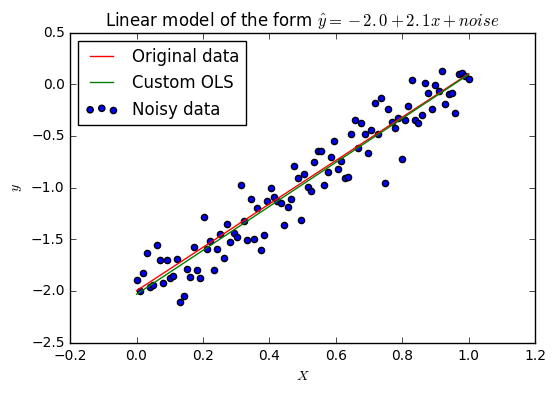

In [1]:
%pylab --no-import-all inline
import _utils

coeffs = (2.1,)
intercept = -1.999 # This is the 0th order coefficient
noise = 0.2
seed = 42

X_prime, y_prime = _utils.generate_linear_1D(coeffs = coeffs, intercept = intercept, noise = noise, seed = seed)
X, y = _utils.generate_linear_1D(coeffs = coeffs, intercept = intercept)

## Because we excluded the intercept, we need to include it as a `1` column
# intercept_column = np.ones((X_prime.shape[0], 1))
# X_matrix = np.concatenate((intercept_column, X_prime), axis=1)

plt.scatter(X_prime, y_prime, label='Noisy data')
plt.plot(X, y, 'r', label = 'Original data')

## OLS
omega = _utils.ols(X_prime, y_prime)
print omega
print("Intercept:")
print("\tcomputed:{0:.2f}".format(omega[0]))
print("\texpected:{0:.2f}".format(intercept))
print("Coefficient 1:")
print("\tcomputed:{0:.2f}".format(omega[1]))
print("\texpected:{0:.2f}".format(coeffs[0]))
# Generate data with the computed intercept/coefficients
X_ols, y_ols = _utils.generate_linear_1D(coeffs = omega[1:], intercept = omega[0])
plt.plot(X_ols, y_ols, 'g', label = 'Custom OLS')

plt.title("Linear model of the form $\hat{y} = %.1f + %.1f x + noise$"%(intercept, coeffs[0]))
plt.ylabel("$y$")
plt.xlabel("$X$")
plt.legend(loc='best')


### SciKit
In `scikit-learn`, the OLS is used in [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), as mentioned in the [source code](https://github.com/scikit-learn/scikit-learn/blob/412996f/sklearn/linear_model/base.py#L469), and can be implemented using the following

Intercept:
	computed:-2.03
	expected:-2.00
Coefficient 1:
	computed:2.13
	expected:2.10


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


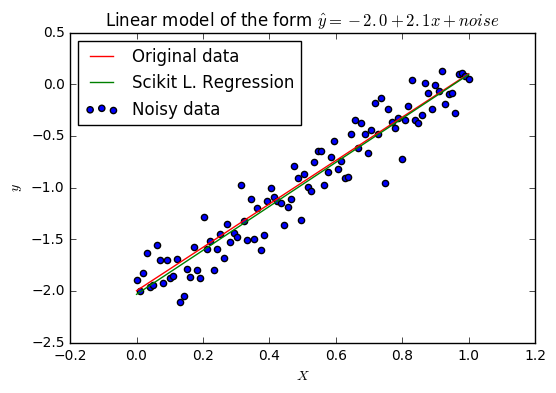

In [2]:
plt.scatter(X_prime, y_prime, label='Noisy data')
plt.plot(X, y, 'r', label = 'Original data')

## Scikit Linear Regression
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_prime, y_prime)
X_scikit, y_scikit = _utils.generate_linear_1D(coeffs = lin_reg.coef_, intercept = lin_reg.intercept_)

print("Intercept:")
print("\tcomputed:{0:.2f}".format(lin_reg.intercept_[0]))
print("\texpected:{0:.2f}".format(intercept))
print("Coefficient 1:")
print("\tcomputed:{0:.2f}".format(lin_reg.coef_[0][0]))
print("\texpected:{0:.2f}".format(coeffs[0]))

plt.plot(X_scikit, y_scikit, 'g', label = 'Scikit L. Regression')
plt.title("Linear model of the form $\hat{y} = %.1f + %.1f x + noise$"%(intercept, coeffs[0]))
plt.ylabel("$y$")
plt.xlabel("$X$")
plt.legend(loc='best')

### TensorFlow
Tensorflow is a low level package, which means that there is no simple `.fit()` command that would assume to use `L2` norm for you. You will have to implement it yourself. You could use a `GradientDescentOptimizer`, but we will go step by step, and implement the equation shown above. You could also use implementations in the `tensorflow.contrib.learn`, but we will discuss them later -- for now we will just implement OLS

Intercept:
	computed:-2.03
	expected:-2.00
Coefficient 1:
	computed:2.13
	expected:2.10


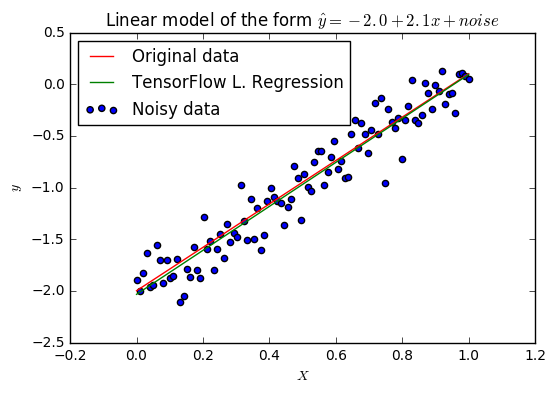

In [3]:
plt.scatter(X_prime, y_prime, label='Noisy data')
plt.plot(X, y, 'r', label = 'Original data')

## Tensorflow Linear Regression
import tensorflow as tf
X_tf = tf.constant(_utils.add_one_column(X_prime)) # We need a column for the intercept
y_tf = tf.constant(y_prime)
inv_tf = tf.matrix_inverse(tf.matmul(X_tf, X_tf, transpose_a = True))
XiXt = tf.matmul(inv_tf, X_tf, transpose_b = True)
omega_tf = tf.matmul(XiXt, y_tf)
sess = tf.Session()
omega_tf = sess.run(omega_tf)
X_tensor, y_tensor = _utils.generate_linear_1D(coeffs = omega_tf[1][0], intercept = omega_tf[0][0])

print("Intercept:")
print("\tcomputed:{0:.2f}".format(omega_tf[0][0]))
print("\texpected:{0:.2f}".format(intercept))
print("Coefficient 1:")
print("\tcomputed:{0:.2f}".format(omega_tf[1][0]))
print("\texpected:{0:.2f}".format(coeffs[0]))

plt.plot(X_tensor, y_tensor, 'g', label = 'TensorFlow L. Regression')
plt.title("Linear model of the form $\hat{y} = %.1f + %.1f x + noise$"%(intercept, coeffs[0]))
plt.ylabel("$y$")
plt.xlabel("$X$")
plt.legend(loc='best')